## Gradient Descent with two variable


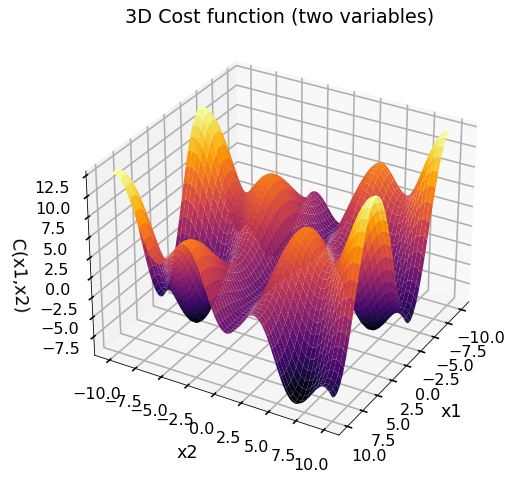

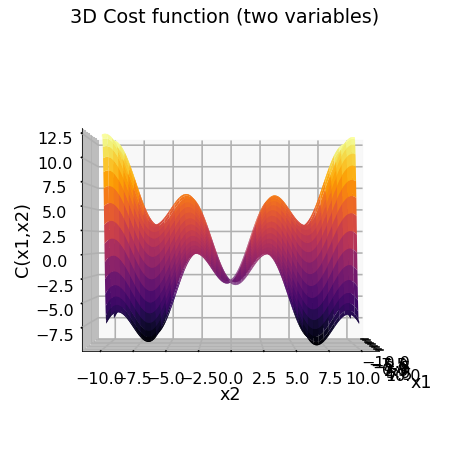

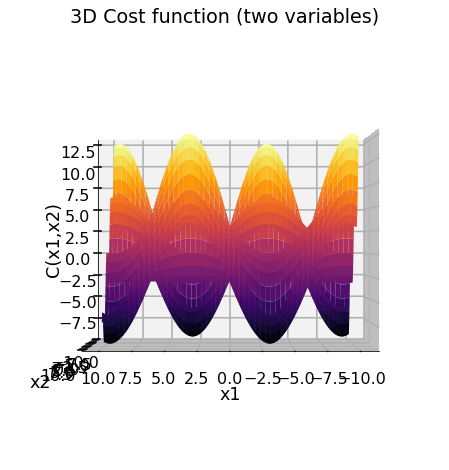

In [56]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

def C(x1, x2):
    if isinstance(x1, list):
        x1 = np.array(x1)
        x2 = np.array(x2)
    return x2*np.sin(0.5*x1) - 3*np.cos(x2)


def dCdx1(x1, x2):
    return -x2 * np.cos(x1/2)


def dCdx2(x1, x2):
    return 3*np.sin(x2) + np.sin(x1/2)


def create_ax():
    fig = plt.figure(figsize=(8, 8))
    ax = plt.axes(projection='3d')
    ax.grid()
    ax.set_title('3D Cost function (two variables)')
    surf = ax.plot_surface(X1, X2, Y, cmap=plt.cm.inferno)
    ax.set_xlabel('x1', labelpad=20)
    ax.set_ylabel('x2', labelpad=20)
    ax.set_zlabel('C(x1,x2)', labelpad=20)
    return ax


x1 = np.arange(-10, 10, 0.1)
x2 = np.arange(-10, 10, 0.1)
X1, X2 = np.meshgrid(x1, x2)
Y = C(X1, X2)

plt.style.use('seaborn-poster')
ax = create_ax()
ax.view_init(30, 30)
plt.show()

ax = create_ax()
ax.view_init(0, 0)
plt.show()

ax = create_ax()
ax.view_init(0, 90)
plt.show()

Find the global minimum by hand

In [57]:
Y = C(X1, X2)
print("Global minimum at: ", end="")

prev_y = 0
min_y, min_x1, min_x2 = np.e**100, np.e**100, np.e**100
for r1, r2 in zip(X1, X2):
    for c1, c2 in zip(r1, r2):
        y = C(c1, c2)
        if y < min_y:
            prev_y = min_y
            min_y = y
            min_x1 = c1
            min_x2 = c2

print(min_y, min_x1, min_x2)
print("The second smallest Y:", prev_y)

Global minimum at: -9.450191275798655 -9.400000000000002 -6.600000000000012
The second smallest Y: -9.446030183113084


Define the optimizer function. The global minimum is at (0,0) so we expect the optimizer to find that point.

In [58]:
def plot_grad_change(X1, X2, C, gradx1s, gradx2s):
    
    def create_ax(title):
        fig = plt.figure(figsize=(8, 8))
        ax = plt.axes(projection='3d')
        ax.grid()
        ax.set_title(title)

        surf = ax.plot_surface(X1, X2, C(X1, X2), cmap=plt.cm.winter, alpha=0.5)
        ax.scatter(gradx1s, gradx2s, C(gradx1s, gradx2s), c='r', marker="v", s=150, alpha=0.9)
        ax.scatter([0], [0], C([0], [0]), c='g', marker="o", s=200, alpha=0.9)
        
        ax.set_xlabel('x1', labelpad=20)
        ax.set_ylabel('x2', labelpad=20)
        ax.set_zlabel('C(x1, x2)', labelpad=20)    
        #ax.set_xticks([])
        #ax.set_yticks([])
        #ax.set_zticks([])
        return ax
        
    
    ax = create_ax("Gradient change")
    ax.view_init(30, 30)
    plt.show()
    
    ax = create_ax("Gradient change from above")
    ax.view_init(90, 0)
    plt.show()


def SGD(X1, X2, C, dCdx1, dCdx2, epochs, eta):
    print(f"SGD(epochs={epochs}, eta={eta})")

    # Get a random point from the input range
    gx1 = np.random.random() * np.max(x1) + np.min(x1)
    gx2 = np.random.random() * np.max(x2) + np.min(x2)
    gy = C(gx1, gx2)
    
    gradx1s = [gx1]
    gradx2s = [gx2]
    gradys = [gy]
    
    for epoch in range(epochs):
        gx1 += -eta*dCdx1(gx1, gx2)
        gx2 += -eta*dCdx2(gx1, gx2)
        gy = C(gx1, gx2)
        
        gradx1s.append(gx1)
        gradx2s.append(gx2)
        gradys.append(gy)
    
    
    plot_grad_change(X1, X2, C, gradx1s, gradx2s)
    return gradx1s[-1], gradx2s[-1]

SGD(epochs=50, eta=0.1)


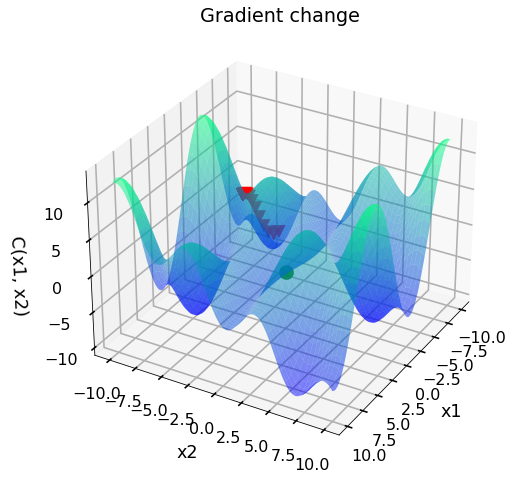

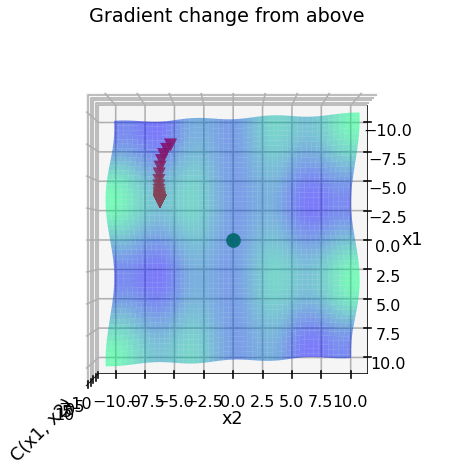

Found minimum at: X = [-3.141592992278247, -5.943348490996487]


In [59]:
epochs = 50
learning_rate = 0.1
np.random.seed(22)
mx1, mx2 = SGD(X1, X2, C, dCdx1, dCdx2, epochs, learning_rate)
print("Found minimum at: X =", [mx1, mx2])

SGD(epochs=50, eta=0.5)


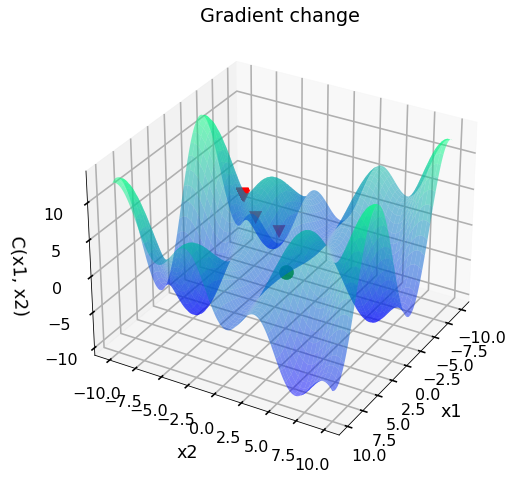

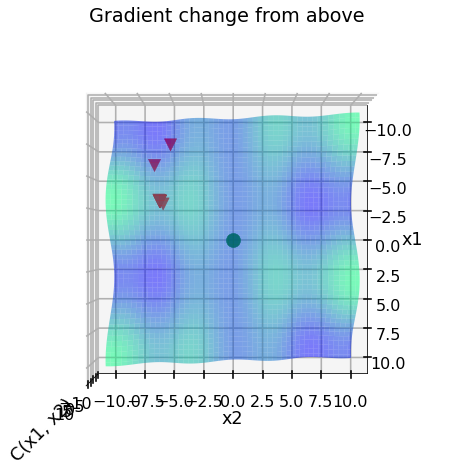

Found minimum at: X = [-3.141592653589793, -5.943348397725464]


In [60]:
epochs = 50
learning_rate = 0.5
np.random.seed(22)
mx1, mx2 = SGD(X1, X2, C, dCdx1, dCdx2, epochs, learning_rate)
print("Found minimum at: X =", [mx1, mx2])

SGD(epochs=50, eta=0.01)


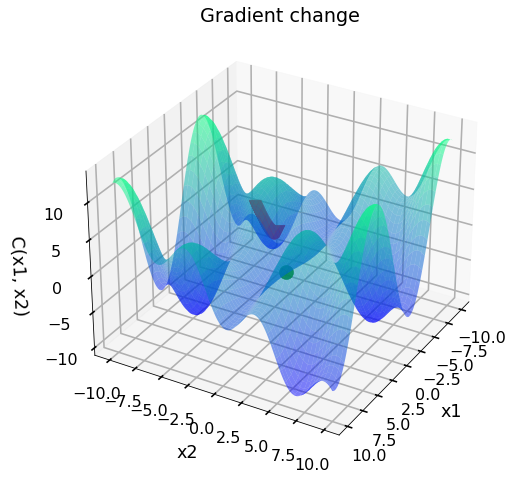

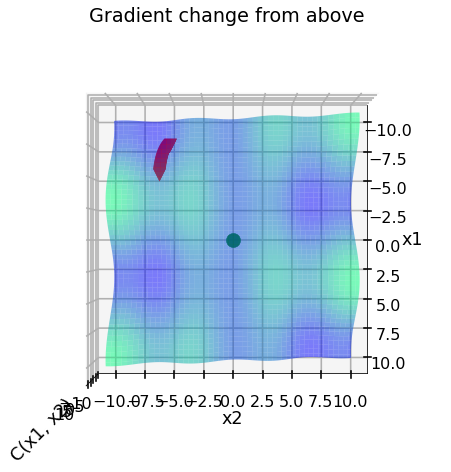

Found minimum at: X = [-5.327484710548798, -6.045056149885807]


In [61]:
epochs = 50
learning_rate = 0.01
np.random.seed(22)
mx1, mx2 = SGD(X1, X2, C, dCdx1, dCdx2, epochs, learning_rate)
print("Found minimum at: X =", [mx1, mx2])

SGD(epochs=200, eta=0.1)


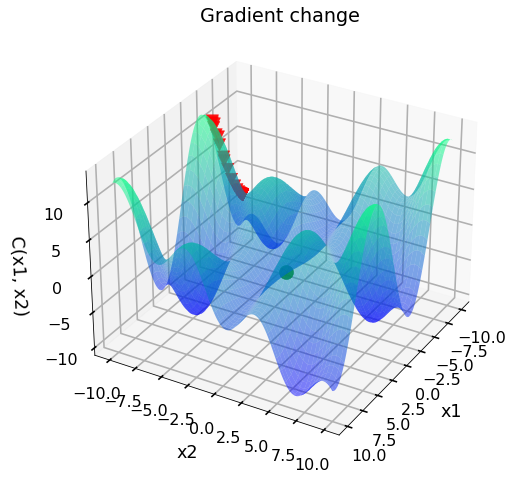

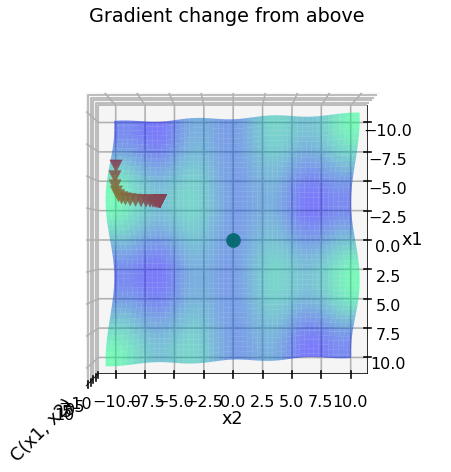

Found minimum at: X = [-3.1415926535897936, -5.943348397725465]


In [62]:
epochs = 200
learning_rate = 0.1
np.random.seed(40)
mx1, mx2 = SGD(X1, X2, C, dCdx1, dCdx2, epochs, learning_rate)
print("Found minimum at: X =", [mx1, mx2])